In [28]:
from imio import load, save
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [29]:
img = load.load_any('/home/john/Documents/MIDSX/data/reference_set/TG 195 Case 5 Voxelized Volume.tif')

In [30]:
save.to_nii(img, '/home/john/Documents/MIDSX/data/reference_set/TG 195 Case 5 Voxelized Volume.nii.gz')

In [31]:
# read in the nifti file
img = nib.load('/home/john/Documents/MIDSX/data/reference_set/TG 195 Case 5 Voxelized Volume.nii.gz')
header = img.header
data = img.get_fdata()

In [32]:
data.shape

(260, 320, 500)

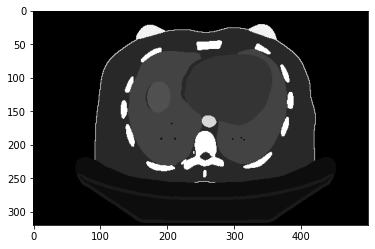

In [33]:
slice = data[100, :, :]
plt.imshow(slice, cmap='gray')

In [34]:
# # reshape (x->z, z->y, y->x)
# data = np.swapaxes(data, 0, 2)
# data = np.swapaxes(data, 0, 1)

# data.shape

(320, 500, 260)

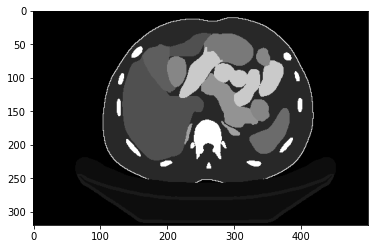

In [38]:
slice = data[:, :, 1]
plt.imshow(slice, cmap='gray')

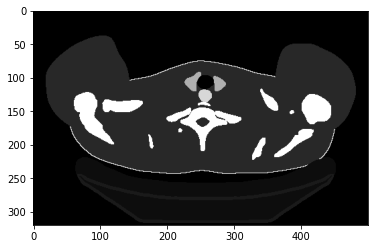

In [43]:
# animate through the slices
import matplotlib.animation as animation
from IPython.display import HTML


fig = plt.figure()
ims = []
for i in range(data.shape[2]):
    im = plt.imshow(data[:, :, i], animated=True, cmap='gray')
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

    

In [47]:
# add 150 to all values
# data = data + 150
# data

In [48]:
header.set_xyzt_units('mm', 'sec')
header.set_data_dtype(np.uint8)
header.set_dim_info(0, 1, 2)

In [52]:
# save the nifti file
img = nib.Nifti1Image(data, None, header=header)
nib.save(img, '/home/john/Documents/MIDSX/data/voxels/TG_195_Case_5_Voxelized_Volume.nii.gz')